In [55]:
import dill
dill.load_session('ch8dimesnionalityreduction.db')

In [56]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

X = load_digits()
pca = PCA(n_components=2)
X2D = pca.fit_transform(X.data)
pca.components_

array([[ 1.59788762e-19, -1.73094665e-02, -2.23428843e-01,
        -1.35913284e-01, -3.30323010e-02, -9.66340685e-02,
        -8.32941312e-03,  2.26900703e-03, -3.20516681e-04,
        -1.19308923e-01, -2.44451684e-01,  1.48512787e-01,
        -4.67319359e-02, -2.17740746e-01, -1.48136512e-02,
         4.47779966e-03, -4.94136713e-05, -7.95419659e-02,
         8.33951356e-02,  2.15915383e-01, -1.72126830e-01,
        -1.63712113e-01,  2.86444607e-02,  4.23251900e-03,
         9.85488484e-05,  6.42318871e-02,  2.54093289e-01,
        -3.56770713e-02, -2.09462587e-01, -4.31311358e-02,
         5.13118777e-02,  2.13422790e-04,  0.00000000e+00,
         1.59950860e-01,  3.68690754e-01,  1.64406824e-01,
         8.52007665e-02,  3.72983005e-02,  2.15867095e-02,
         0.00000000e+00,  1.28865575e-03,  1.06945272e-01,
         3.03067446e-01,  2.47813041e-01,  2.09637273e-01,
         1.22325201e-02, -3.69458303e-02,  1.61485140e-03,
         6.93023718e-04, -8.35144325e-03, -5.58598937e-0

In [57]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [58]:
X.data.shape

(1797, 64)

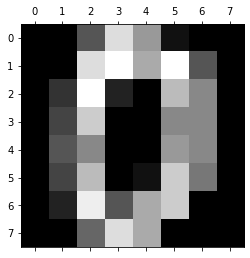

In [59]:
import matplotlib.pyplot as plt
plt.matshow(X.images[0])
plt.show()

Previously you had to specify the components, however what if you want a ratio for instance you want to preserve 95% of the data, this can also be done in the same way, instead of writing n_components=2 you just say =0.95

In [60]:
pca_95 = PCA(n_components=0.95)
X2D_95 = pca_95.fit_transform(X.data)
pca_95.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [61]:
pca_95.components_

array([[-1.77484909e-19, -1.73094651e-02, -2.23428835e-01, ...,
        -8.94184677e-02, -3.65977111e-02, -1.14684954e-02],
       [ 3.27805401e-18, -1.01064569e-02, -4.90849204e-02, ...,
         1.76697117e-01,  1.94547053e-02, -6.69693895e-03],
       [-1.68358559e-18,  1.83420720e-02,  1.26475543e-01, ...,
         2.32084163e-01,  1.67026563e-01,  3.48043832e-02],
       ...,
       [ 1.33815481e-17,  8.24410330e-03,  1.42774093e-01, ...,
        -1.07466629e-02,  3.38995330e-01,  1.58789644e-01],
       [-3.84384960e-18,  9.17016581e-03,  4.17946439e-02, ...,
         1.30708382e-01, -1.34487279e-02,  2.11313565e-02],
       [-4.85442521e-18,  1.79906763e-03, -4.74972508e-02, ...,
         3.01741290e-02,  8.16530266e-02,  5.93242720e-02]])

In [62]:
X2D_95.shape

(1797, 29)

You can recover back from the reduced version using the below

In [64]:
X_recovered = pca_95.inverse_transform(X2D_95)
X_recovered.shape

(1797, 64)

PCA is very slow as you would need to use the entire dataset, however you can use incremental PCA for online learning or having a small dataset at a time.

In [66]:
from sklearn.decomposition import IncrementalPCA
import numpy as np

n_batches = 100
inc_pca = IncrementalPCA(n_components=2)
for X_batch in np.array_split(X.data, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X.data)
X_reduced

array([[ -0.55291874, -21.16650296],
       [  6.8870461 ,  22.83021328],
       [  7.74421026,  12.48728446],
       ...,
       [ 10.95095237,   7.78560133],
       [ -3.99536842,  -8.15272079],
       [  1.73744108,  -6.80900828]])

PCA is a projection approach at dimensionality reduction, however there is another approach as well and this is manifold, one of these is called LLE. This basically is trying to find neighbors and keep the squared distance as small as possible.

In [68]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced_lle = lle.fit_transform(X.data)
X_reduced_lle.shape

(1797, 2)

In [70]:
import dill
dill.dump_session('ch8dimesnionalityreduction.db')